In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
train = pd.read_csv(r'C:\Users\TWASOL\Downloads\train.csv')
test= pd.read_csv(r'C:\Users\TWASOL\Downloads\test.csv')

In [3]:
train=train.drop(['Id','cut','color','clarity'],axis=1)
test=test.drop(['cut','color','clarity'],axis=1)

In [4]:
train.head()

,carat,depth,table,price,x,y,z
0,1.06,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,61.3,56.0,828,4.43,4.41,2.71
3,0.53,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,61.0,57.0,2596,5.76,5.72,3.50


In [5]:
train.shape

(43152, 7)

In [6]:
train.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [7]:
train.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   43152 non-null  float64
 1   depth   43152 non-null  float64
 2   table   43152 non-null  float64
 3   price   43152 non-null  int64  
 4   x       43152 non-null  float64
 5   y       43152 non-null  float64
 6   z       43152 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.3 MB


In [9]:
train.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
train.isnull().sum()

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

Text(0, 0.5, 'Diamond price')

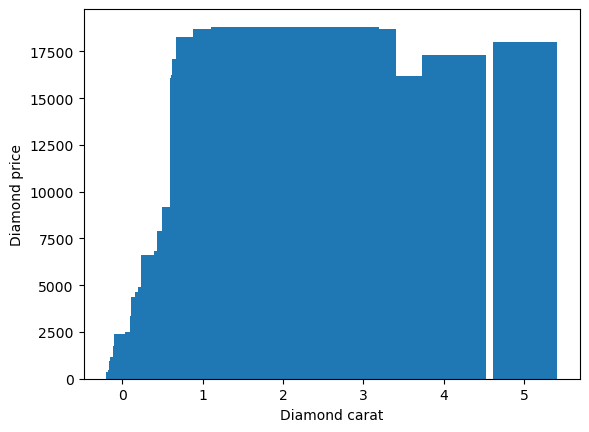

In [11]:
plt.bar(train['carat'], train['price'])
plt.xlabel('Diamond carat')
plt.ylabel('Diamond price')

In [12]:
train = train.drop(train[train['x'] == 0].index)
train = train.drop(train[train['y'] == 0].index)
train = train.drop(train[train['z'] == 0].index)

In [13]:
   ### labelEncoder = LabelEncoder()
   ## cols = ['cut','color','clarity']
   ## for col in cols:
   ## train[col] = labelEncoder.fit_transform(train[col])###

In [14]:
train.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.023989,0.182861,0.921872,0.977923,0.948733,0.957294
depth,0.023989,1.000000,-0.302684,-0.013225,-0.029508,-0.033253,0.090595
table,0.182861,-0.302684,1.000000,0.128571,0.198068,0.185019,0.152507
price,0.921872,-0.013225,0.128571,1.000000,0.887172,0.862936,0.864861
x,0.977923,-0.029508,0.198068,0.887172,1.000000,0.969251,0.971492
y,0.948733,-0.033253,0.185019,0.862936,0.969251,1.000000,0.948567
z,0.957294,0.090595,0.152507,0.864861,0.971492,0.948567,1.000000


<Axes: >

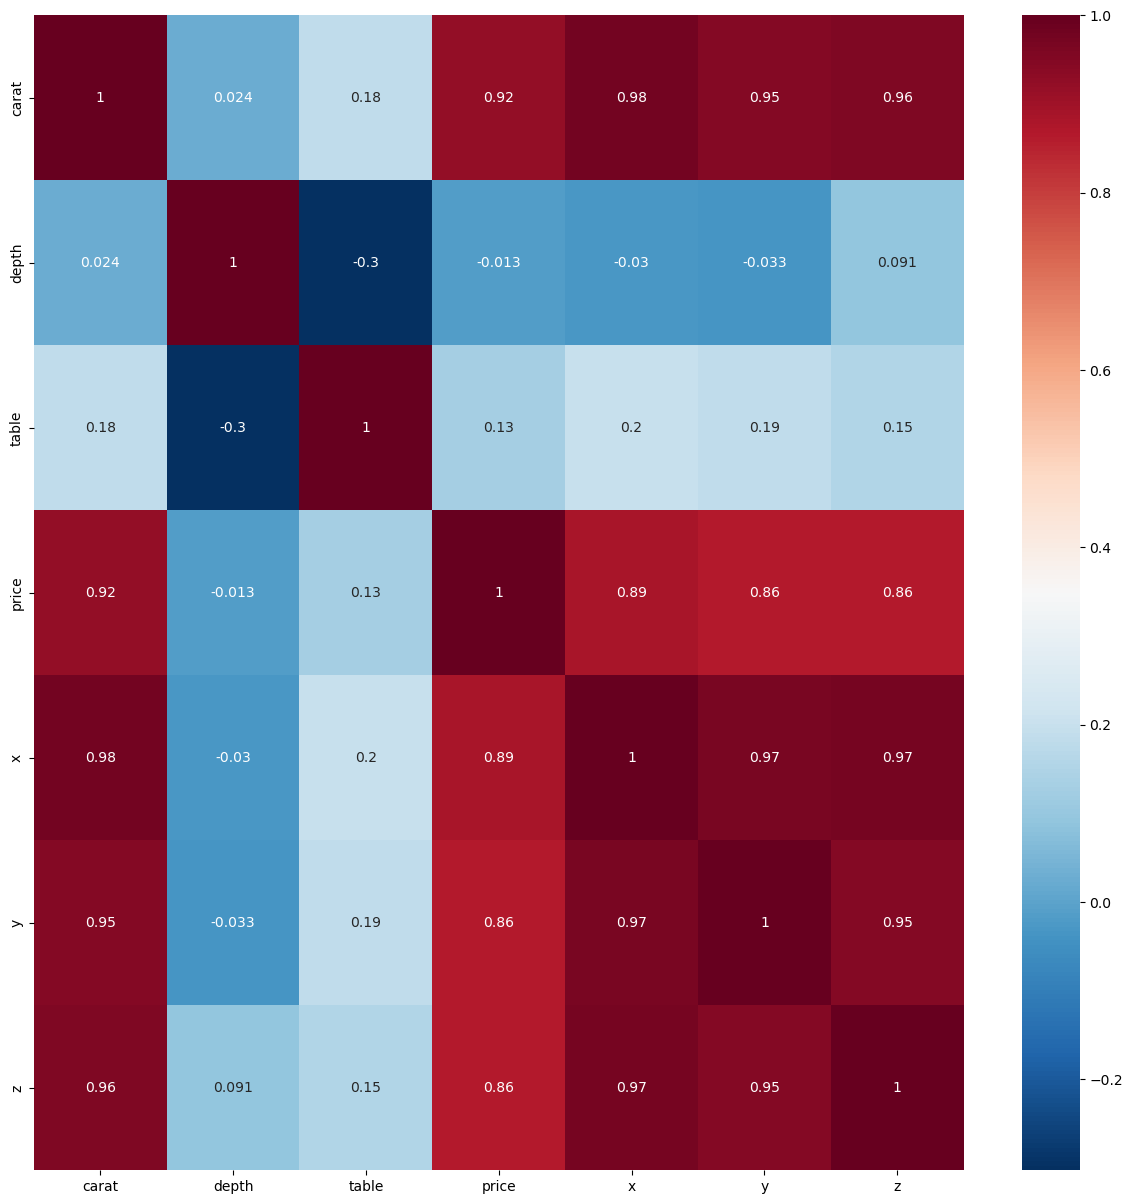

In [15]:
plt.subplots(figsize=(15,15))
sns.heatmap(train.corr(), annot=True, cmap='RdBu_r')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


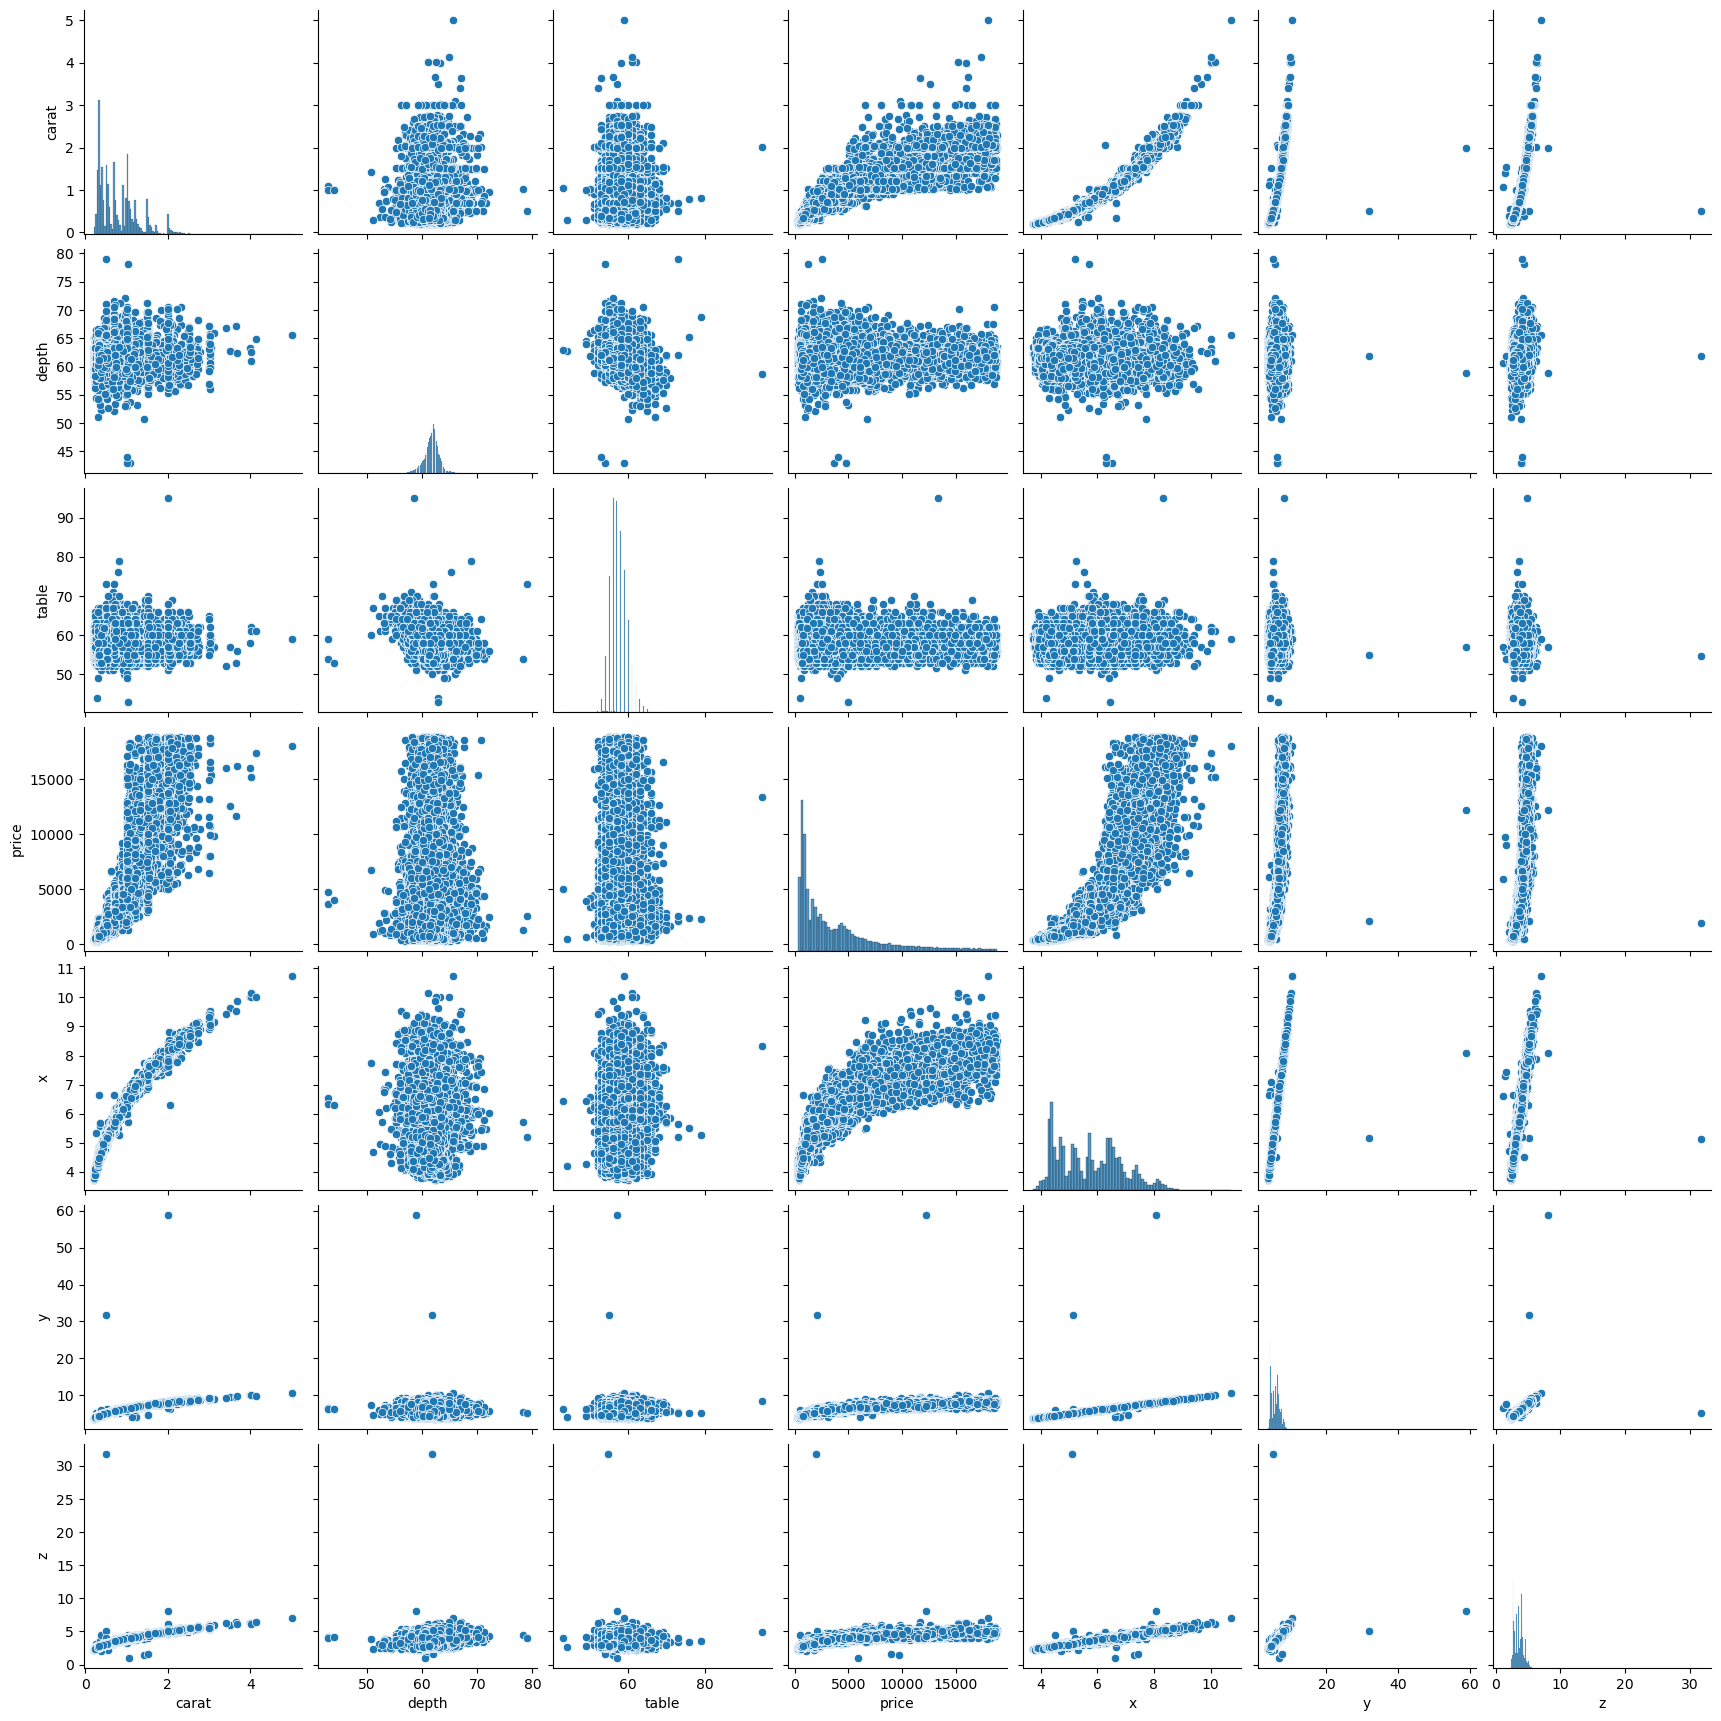

In [16]:
sns.pairplot(train)
plt.grid()
plt.show()

In [17]:
train['z']=train['z'].replace(0,train['z'].mean())
train['x']=train['x'].replace(0,train['x'].mean())
train['y']=train['y'].replace(0,train['y'].mean())

carat


C:\Users\TWASOL\AppData\Local\Temp\ipykernel_27828\436978052.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(train[feature])


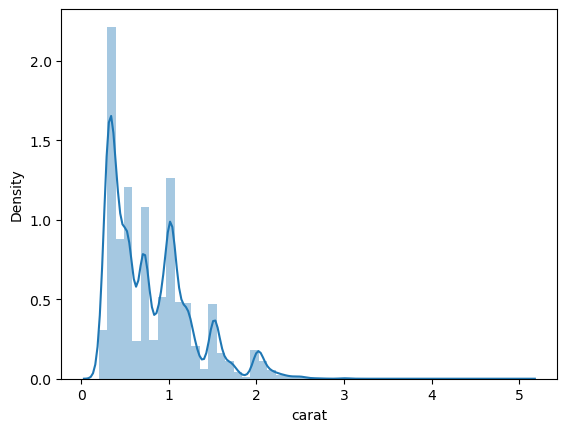

depth


C:\Users\TWASOL\AppData\Local\Temp\ipykernel_27828\436978052.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(train[feature])


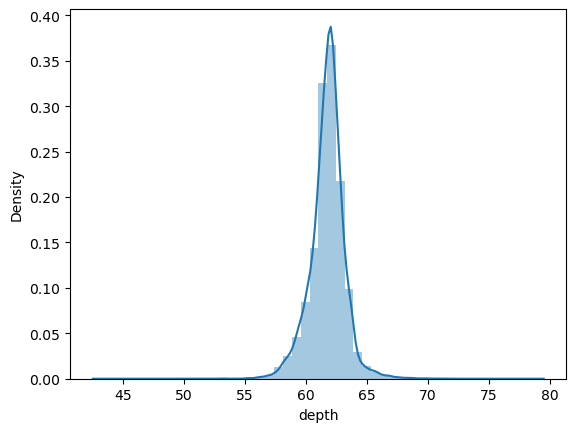

table


C:\Users\TWASOL\AppData\Local\Temp\ipykernel_27828\436978052.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(train[feature])


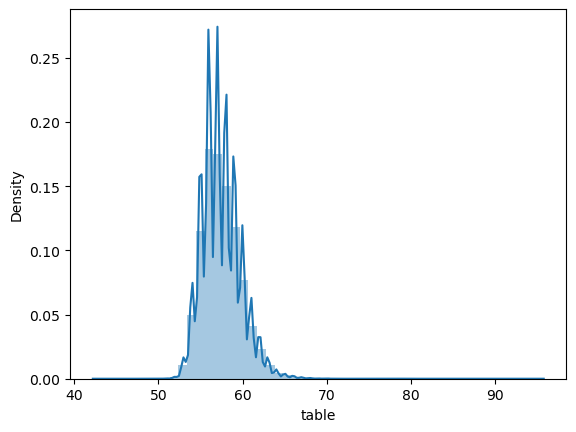

price


C:\Users\TWASOL\AppData\Local\Temp\ipykernel_27828\436978052.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(train[feature])


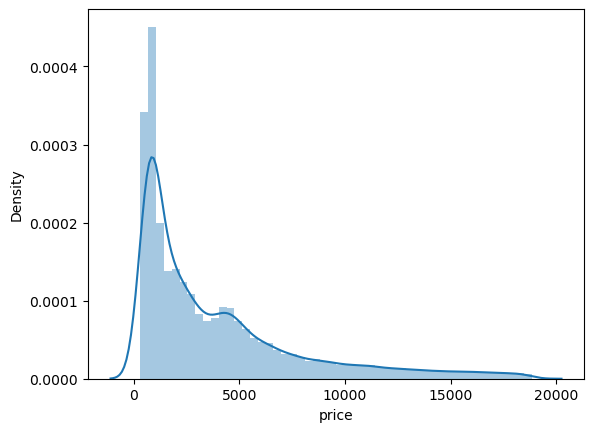

x


C:\Users\TWASOL\AppData\Local\Temp\ipykernel_27828\436978052.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(train[feature])


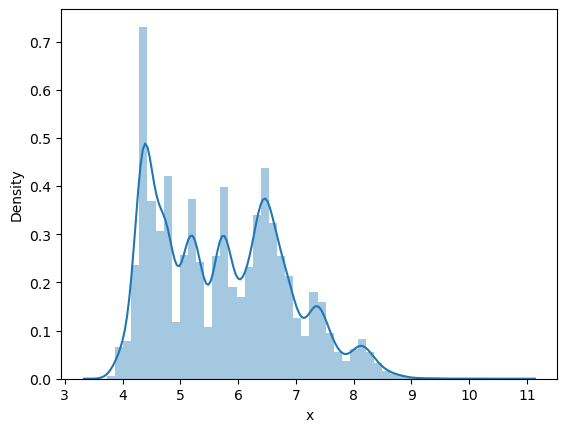

y


C:\Users\TWASOL\AppData\Local\Temp\ipykernel_27828\436978052.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(train[feature])


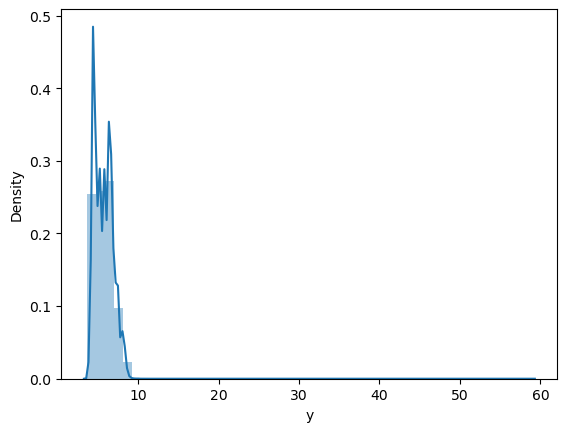

z


C:\Users\TWASOL\AppData\Local\Temp\ipykernel_27828\436978052.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(train[feature])


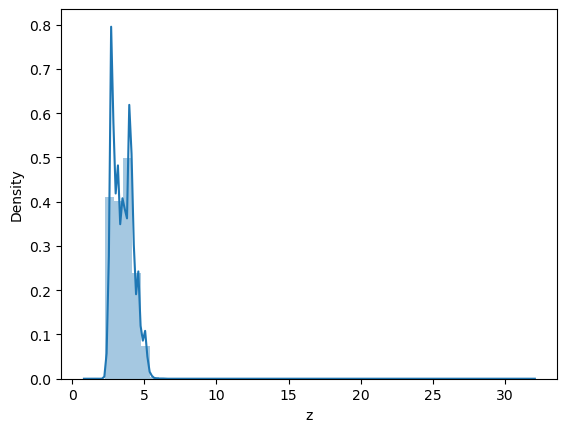

In [18]:
num_features=['carat','depth','table','price','x','y','z']
for feature in num_features:
    print(feature)
    ax=sns.distplot(train[feature])
    plt.show() 
    

In [19]:
num_features=['carat','depth','table','price','x','y','z']
for feature in num_features:
    train[feature]=np.log(train[feature])
    #ax=sns.distplot(train[feature])
    #plt.show() 
    
train.head()

,carat,depth,table,price,x,y,z
0,0.058269,4.123903,4.043051,8.359369,1.882514,1.887070,1.403643
1,0.412110,4.109233,4.060443,9.626679,1.998774,2.004179,1.506297
2,-1.139434,4.115780,4.025352,6.719013,1.488400,1.483875,0.996949
3,-0.634878,4.114147,4.025352,7.363280,1.646734,1.652497,1.160021
4,-0.356675,4.110874,4.043051,7.861727,1.750937,1.743969,1.252763


In [20]:
#print(train['cut'].value_counts())
#print(train['color'].value_counts())
#print(train['clarity'].value_counts())

In [21]:
#categorical_feat=['cut','color','clarity']
#for feature in categorical_feat:
 #   le=LabelEncoder();
#le.fit(train[feature])
#print(le.classes_)
##train[feature]=le.transform(train[feature])
#train.head()

In [22]:
feature_scale=[feature for feature in train.columns if feature not in ['price']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train[feature_scale])
train[feature_scale]=scaler.transform(train[feature_scale])
test[feature_scale]=scaler.transform(test[feature_scale])
train.head()

,carat,depth,table,price,x,y,z
0,0.517781,0.596308,0.355569,8.359369,0.535291,0.210664,0.393886
1,0.627639,0.572190,0.377509,9.626679,0.645222,0.252897,0.424151
2,0.145924,0.582953,0.333240,6.719013,0.162629,0.065260,0.273981
3,0.302576,0.580269,0.333240,7.363280,0.312345,0.126071,0.322059
4,0.388951,0.574887,0.355569,7.861727,0.410876,0.159058,0.349402


In [23]:

y=train['price']
x=train.drop(['price'],axis=1)
x.head()


,carat,depth,table,x,y,z
0,0.517781,0.596308,0.355569,0.535291,0.210664,0.393886
1,0.627639,0.572190,0.377509,0.645222,0.252897,0.424151
2,0.145924,0.582953,0.333240,0.162629,0.065260,0.273981
3,0.302576,0.580269,0.333240,0.312345,0.126071,0.322059
4,0.388951,0.574887,0.355569,0.410876,0.159058,0.349402


In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [25]:
LR = LinearRegression()  
LR.fit(X_train, y_train) #training the algorithm
print(LR.intercept_)
print(LR.coef_)

6.2755045819710205
[ 3.71853382 -0.58848948 -0.71560731  1.16466     1.25150533  0.21658637]


In [26]:
#### Predcit the results using the created model ####
y_pred=LR.predict(X_test)
data_result=pd.DataFrame({'Actual':y_test,'Predict':y_pred})
data_result.head(10)

,Actual,Predict
29445,8.010028,8.043662
19276,8.339262,8.499408
42618,6.442540,6.440045
8325,7.400621,7.457187
32475,6.872128,6.552817
4087,9.574567,9.683316
14319,6.687109,6.503209
32341,8.071219,8.169138
15407,7.890957,7.859493
41038,6.326149,6.064559


In [27]:
print("accuracy: "+ str(LR.score(X_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 93.50597727449373%
Mean absolute error: 0.20124878197261986
Mean squared error: 0.06642639092698804
R Squared: 0.9350597727449373
Adjusted R Squared: 0.9350221087690326


In [28]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model1=sm.OLS(y_train,X_train)

result=model1.fit()

y_pred_ols=result.predict(X_test)

In [29]:
data_result=pd.DataFrame({'Actual':y_pred_ols,'Predict':y_pred})
data_result

,Actual,Predict
29445,8.054388,8.043662
19276,8.535425,8.499408
42618,6.472560,6.440045
8325,7.430078,7.457187
32475,6.680753,6.552817
...,...,...
20034,9.595343,9.632191
9755,9.187326,9.160614
6715,8.225230,8.332571
3875,8.024609,8.009666


In [30]:
print("accuracy: "+ str(LR.score(X_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_pred_ols,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_pred_ols,y_pred)))
R2 = r2_score(y_pred_ols,y_pred)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 93.50597727449373%
Mean absolute error: 0.0726856325722911
Mean squared error: 0.010569585718608599
R Squared: 0.9890876300020649
Adjusted R Squared: 0.9890813010553082


In [31]:
ID=test['Id']
ID


0            1
1            2
2            3
3            4
4            5
         ...  
10783    10784
10784    10785
10785    10786
10786    10787
10787    10788
Name: Id, Length: 10788, dtype: int64

In [32]:

price=LR.predict(test.drop('Id',axis=1))
data={'ID':ID,'price':price}
sub=pd.DataFrame(data)
sub.to_csv('sub.csv',index=False)

In [33]:
sub

,ID,price
0,1,-89.879423
1,2,-89.964915
2,3,-89.964896
3,4,-87.688818
4,5,-88.606572
...,...,...
10783,10784,-87.184836
10784,10785,-85.394884
10785,10786,-86.919527
10786,10787,-88.155099


In [34]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [35]:
tree_pred=tree_model.predict(X_test)
tree_mse=mean_squared_error(y_test,tree_pred)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.3253496573917938

In [36]:
sum_df=pd.DataFrame(data={'existed':list(y_test),'outcome':tree_pred})
sum_df['accuracy']=abs(sum_df['outcome']/sum_df['existed'])
sum_df.loc[sum_df['accuracy']>1,'accuracy']=2-sum_df['accuracy']
sum_df['accuracy'].mean()

0.967655571038729

In [37]:
from sklearn.ensemble import RandomForestRegressor
forest_model=RandomForestRegressor(n_estimators=100,random_state=40)
forest_model.fit(X_train,y_train)
forest_pred=forest_model.predict(X_train)
forest_mse=mean_squared_error(y_train,forest_pred)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

0.09941277157684832

In [38]:
from sklearn.model_selection import RandomizedSearchCV
p_d={
    'n_estimators':np.random.randint(1,200,10),
    'max_features':np.random.randint(1,8,10)
}
forest_mod=RandomForestRegressor(random_state=40)
random_search=RandomizedSearchCV(forest_mod,param_distributions=p_d,n_iter=10,cv=5,scoring='neg_mean_squared_error',random_state=40)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=40),
                   param_distributions={'max_features': array([7, 5, 7, 7, 6, 5, 3, 4, 1, 1]),
                                        'n_estimators': array([ 76, 124,  62,  91,  71,  91, 119, 158,  34,   6])},
                   random_state=40, scoring='neg_mean_squared_error')

In [39]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.2597189341121714 {'n_estimators': 6, 'max_features': 4}
0.24487175609761916 {'n_estimators': 91, 'max_features': 4}
0.2439068675831754 {'n_estimators': 91, 'max_features': 3}
0.24544772525221045 {'n_estimators': 91, 'max_features': 5}
0.2480979386867244 {'n_estimators': 34, 'max_features': 7}
0.2451331617667861 {'n_estimators': 124, 'max_features': 5}
0.24640053423988892 {'n_estimators': 76, 'max_features': 6}
0.24600384836929456 {'n_estimators': 91, 'max_features': 6}
0.26173582497893266 {'n_estimators': 6, 'max_features': 7}
0.2445583211160479 {'n_estimators': 62, 'max_features': 3}


In [40]:
sum_df=pd.DataFrame(data={'existed':list((y_train)),'outcome':forest_pred})
sum_df['accuracy']=abs(sum_df['outcome']/sum_df['existed'])
sum_df.loc[sum_df['accuracy']>1,'accuracy']=2-sum_df['accuracy']
accuracy_mean=sum_df['accuracy'].mean()
print(f"accuracy mean = {accuracy_mean}")
sum_df

accuracy mean = 0.9902387441374142


,existed,outcome,accuracy
0,8.459352,8.500614,0.995122
1,6.738152,6.729196,0.998671
2,7.959276,7.863170,0.987925
3,7.463937,7.426858,0.995032
4,7.970740,7.950152,0.997417
...,...,...,...
34503,7.518064,7.518908,0.999888
34504,6.777647,6.568064,0.969077
34505,7.463937,7.400788,0.991539
34506,7.012115,7.346435,0.952323


In [41]:
pricee=forest_model.predict(test.drop('Id',axis=1))
data={'ID':ID,'price':pricee}
subb=pd.DataFrame(data)
subb.to_csv('sub.csv',index=False)

In [42]:
subb

,ID,price
0,1,9.122068
1,2,9.133122
2,3,9.129722
3,4,9.126819
4,5,9.122068
...,...,...
10783,10784,9.131203
10784,10785,9.138462
10785,10786,9.133122
10786,10787,9.169574


In [43]:
test['approx_volume']=test['x']*test['y']*test['z']
test.drop(['depth','x','y','z'],axis=1,inplace=True)
#encoded(test,cut_list,'cut')
#encoded(test,color_list,'color')
#encoded(test,clarity_list,'clarity')
test.head()

,Id,carat,table,approx_volume
0,1,0.605251,67.163315,2.744749
1,2,0.720127,68.424863,6.837216
2,3,0.636299,65.901767,3.768430
3,4,0.751174,69.686411,8.126961
4,5,0.623880,65.901767,3.433304
